In [3]:
import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 
!pip install geopy

from geopy.geocoders import Nominatim 

import requests 
from pandas.io.json import json_normalize 


import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

import folium 

print('Libraries imported.')

Libraries imported.


In [4]:
# Extracting the data from the json file

with open('nyu-2451-34572-geojson.json') as json_data:
    newyork_data = json.load(json_data)

In [5]:
neighborhoods_info = newyork_data['features']

In [6]:
neighborhoods_info[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [7]:
# Creating a dataframe by converting the json data

column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

neighborhoods = pd.DataFrame(columns=column_names)

neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [8]:
for data in neighborhoods_info:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [9]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [10]:
# Summary of Dataframe

print('The New York City neighborhoods dataframe has {} boroughs and {} neighborhoods.'.format(len(neighborhoods['Borough'].unique()),
       neighborhoods.shape[0]))

The New York City neighborhoods dataframe has 5 boroughs and 306 neighborhoods.


In [11]:
# Let's get the Indian Restaurants information by using the Foursquare API

def get_venues(lat,lng):
    
    #set variables
    CLIENT_ID = 'DO0Y2UJIE4LUPBGU3YZVPOHIDZQYYUGGBO1TLZ4FCZBX4JDJ' 
    CLIENT_SECRET = 'CV25T2HSUKJNEHV0QPJWQCRTCAJRA4SNUV2BTQXKVAMAVH0Z' 
    VERSION = '20200604' 
    LIMIT = 500
    radius = 500
    search_query = 'Indian Restaurants'
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&query={}&ll={},{}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            search_query,
            lat, 
            lng)
    
    results = requests.get(url).json()
    venue_data=results['response']['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [12]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
indian_restaurants_ny=pd.DataFrame(columns=column_names)
count=1
for row in neighborhoods.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    indian_resturants=venues[venues['Category']=='Indian Restaurant']  
    print('(',count,'/',len(neighborhoods),')','indian Resturants in '+Neighborhood+', '+Borough+':'+str(len(indian_resturants)))
    for resturant_detail in indian_resturants.values.tolist():
        id, name , category=resturant_detail
        indian_restaurants_ny = indian_restaurants_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                                }, ignore_index=True)
    count+=1

( 1 / 306 ) indian Resturants in Wakefield, Bronx:12
( 2 / 306 ) indian Resturants in Co-op City, Bronx:22
( 3 / 306 ) indian Resturants in Eastchester, Bronx:16
( 4 / 306 ) indian Resturants in Fieldston, Bronx:11
( 5 / 306 ) indian Resturants in Riverdale, Bronx:14
( 6 / 306 ) indian Resturants in Kingsbridge, Bronx:30
( 7 / 306 ) indian Resturants in Marble Hill, Manhattan:30
( 8 / 306 ) indian Resturants in Woodlawn, Bronx:17
( 9 / 306 ) indian Resturants in Norwood, Bronx:14
( 10 / 306 ) indian Resturants in Williamsbridge, Bronx:15
( 11 / 306 ) indian Resturants in Baychester, Bronx:15
( 12 / 306 ) indian Resturants in Pelham Parkway, Bronx:14
( 13 / 306 ) indian Resturants in City Island, Bronx:30
( 14 / 306 ) indian Resturants in Bedford Park, Bronx:8
( 15 / 306 ) indian Resturants in University Heights, Bronx:30
( 16 / 306 ) indian Resturants in Morris Heights, Bronx:30
( 17 / 306 ) indian Resturants in Fordham, Bronx:30
( 18 / 306 ) indian Resturants in East Tremont, Bronx:12

In [16]:
indian_restaurants_ny.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Wakefield,4c0448d9310fc9b6bf1dc761,Curry Spot
1,Bronx,Wakefield,4fdd2908e4b0ec5a8f28090f,Neha Palace
2,Bronx,Wakefield,570c3a3fcd10eecd0d0434cd,Agra Grill
3,Bronx,Wakefield,57363fd4498eb703a5b5ea35,Aman Restaurant
4,Bronx,Wakefield,4ebc16ae0aafea6482ae0207,Rochambeau West


In [17]:
indian_restaurants_ny.shape

(6520, 4)

In [18]:
# storing the data into a csv
indian_restaurants_ny.to_csv('indian_restaurants_ny.csv', index=False)

In [19]:
indian_restaurants_ny_csv = pd.read_csv('indian_restaurants_ny.csv')

In [20]:
indian_restaurants_ny_csv.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Wakefield,4c0448d9310fc9b6bf1dc761,Curry Spot
1,Bronx,Wakefield,4fdd2908e4b0ec5a8f28090f,Neha Palace
2,Bronx,Wakefield,570c3a3fcd10eecd0d0434cd,Agra Grill
3,Bronx,Wakefield,57363fd4498eb703a5b5ea35,Aman Restaurant
4,Bronx,Wakefield,4ebc16ae0aafea6482ae0207,Rochambeau West


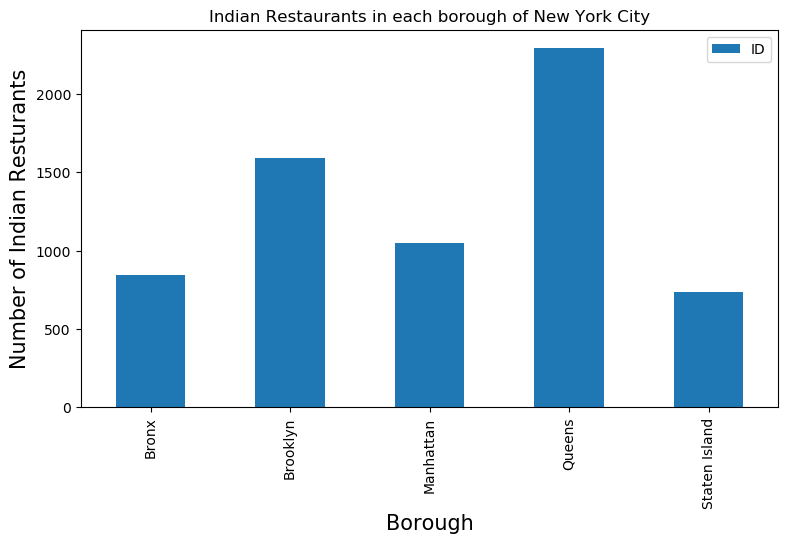

In [21]:
# Let's divide the restaurants based on boroughs

plt.figure(figsize=(9,5), dpi = 100)  #title

plt.title('Indian Restaurants in each borough of New York City')  #title

plt.xlabel('Borough', fontsize = 15)  #x-axis

plt.ylabel('Number of Indian Resturants', fontsize=15)   #y-axis

indian_restaurants_ny_csv.groupby('Borough')['ID'].count().plot(kind='bar')  #Bar plot

plt.legend()  #legend

plt.show()

From this we can see that the borough of Queens has the most Indian Restaurants followed by Brooklyn.

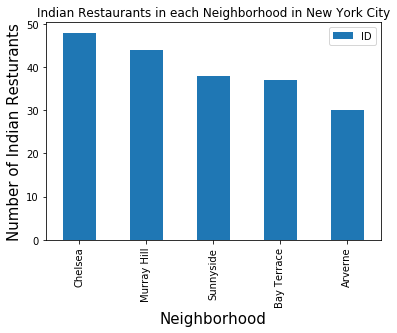

In [22]:
# Let's divide the restaurants based on neighborhoods


plt.title('Indian Restaurants in each Neighborhood in New York City') 

plt.xlabel('Neighborhood', fontsize = 15)

plt.ylabel('Number of Indian Resturants', fontsize=15)

indian_restaurants_ny.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='bar')

plt.legend()

plt.show()

From this we can see that the neighborhood of Chelsea  has the most Indian Restaurants followed by Murray Hill.